EN3160 - Assignment_3 
- Pathirana R. P. S.
- 210451U

## Question 1

Files already downloaded and verified
Files already downloaded and verified
Iteration 1/20, loss: 0.976967019379139
Iteration 2/20, loss: 0.9498506715297699
Iteration 3/20, loss: 0.9361129111647606
Iteration 4/20, loss: 0.9275565923452377
Iteration 5/20, loss: 0.9216149933338166
Iteration 6/20, loss: 0.9172094138264656
Iteration 7/20, loss: 0.9137955758571624
Iteration 8/20, loss: 0.9110685649514199
Iteration 9/20, loss: 0.9088390943408012
Iteration 10/20, loss: 0.9069859728217124
Iteration 11/20, loss: 0.9054256466031074
Iteration 12/20, loss: 0.9040978538393974
Iteration 13/20, loss: 0.9029589185714721
Iteration 14/20, loss: 0.9019756343364715
Iteration 15/20, loss: 0.9011217309236527
Iteration 16/20, loss: 0.9003767268061638
Iteration 17/20, loss: 0.8997241614460945
Iteration 18/20, loss: 0.8991506174206734
Iteration 19/20, loss: 0.8986451269388199
Iteration 20/20, loss: 0.8981984869241715


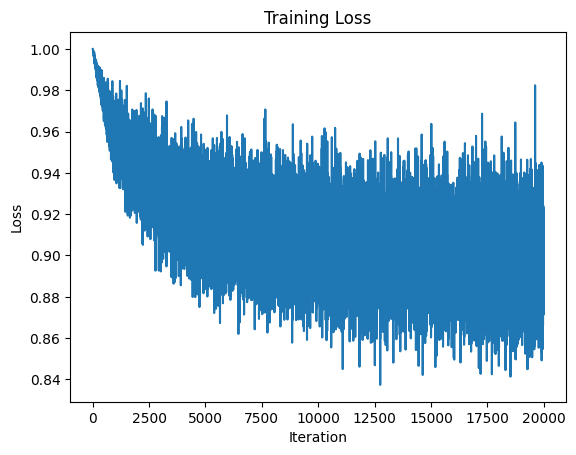

Training accuracy: 32.19%
Test accuracy : 32.40%


In [ ]:
import torch
import torch .nn as nn
import torch .optim as optim
import torchvision
import torchvision .transforms as transforms
import matplotlib . pyplot as plt

# 1. Dataloading

transform = transforms.Compose([transforms .ToTensor() ,transforms .Normalize((0.5 , 0.5, 0.5) , (0.5 , 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root= './data' , train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset , batch_size=batch_size ,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root= './data' , train=False ,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset , batch_size=batch_size ,shuffle=False , num_workers=2)


classes = ( 'plane ' , 'car ' , 'bird ' , 'cat ' ,' deer ' , 'dog ' , 'frog ' , 'horse ' , 'ship ' , 'truck' )

# 2. Define Network Parameters

Din = 3 * 32 * 32 # Input size (flattened CIFAR=10 image size)
K = 10 # Output size (number of classes in CIFAR=10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20

lr = 2e-6 # Learning rate
lr_decay = 0.9 # Learning rate decay
reg = 0 # Regularization
loss_history = []

# 3. Training Loop

for t in range(iterations ):
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        # Get inputs and labels
        inputs , labels = data
        Ntr = inputs.shape[0] # Batch size
        x_train = inputs.view(Ntr, -1) # Flatten input to (Ntr, Din)
        y_train_onehot = nn. functional .one_hot(labels , K). float () # Convert labels to one=hot encoding
        
        # Forward pass
        y_pred = x_train.mm(w) + b # Output layer activation

        # Compute loss
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t ().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss every 10 iterations
    if t % 1 == 0:
        print(f'Iteration {t + 1}/{ iterations }, loss: {running_loss / len(trainloader)}')
    lr *= lr_decay

# 4. Plot Loss

plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# 5. Test Accuracy

correct_train = 0
total_train = 0
with torch .no_grad ():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn. functional .one_hot(labels , K). float ()

        # Forward pass
        y_train_pred = x_train .mm(w) + b
        predicted_train = torch .argmax(y_train_pred , dim=1)
        total_train += labels . size (0)
        correct_train += (predicted_train == labels ).sum(). item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc :.2f}%" )


# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch .no_grad ():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()
        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels . size (0)
        correct_test += (predicted_test == labels ).sum(). item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy : {test_acc :.2f}%" )




 ### a). Add a middle layer with 100 nodes and sigmoid activations

Files already downloaded and verified
Files already downloaded and verified
Iteration 1/20, loss: 0.9902706246972084
Iteration 2/20, loss: 0.9740581014156342
Iteration 3/20, loss: 0.9619739781022072
Iteration 4/20, loss: 0.9527949450016022
Iteration 5/20, loss: 0.9457030339241028
Iteration 6/20, loss: 0.9401392232179642
Iteration 7/20, loss: 0.9357138107419014
Iteration 8/20, loss: 0.9321499187350273
Iteration 9/20, loss: 0.9292477806210517
Iteration 10/20, loss: 0.926860699236393
Iteration 11/20, loss: 0.9248794923424721
Iteration 12/20, loss: 0.9232217426896095
Iteration 13/20, loss: 0.9218244734406471
Iteration 14/20, loss: 0.9206390027999878
Iteration 15/20, loss: 0.9196272829174995
Iteration 16/20, loss: 0.9187592636346817
Iteration 17/20, loss: 0.9180109308958053
Iteration 18/20, loss: 0.9173630248308182
Iteration 19/20, loss: 0.9167998684048653
Iteration 20/20, loss: 0.9163086730241775


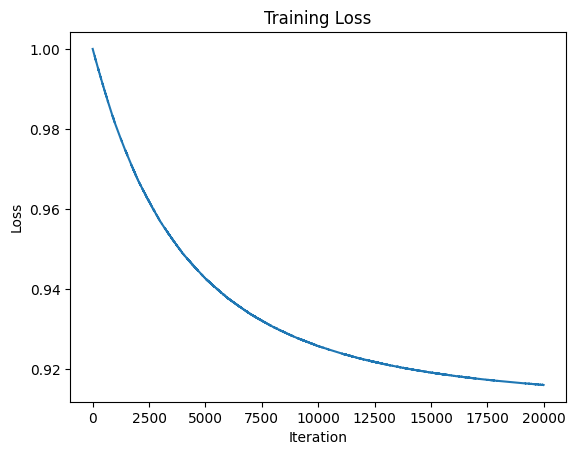

Training accuracy: 10.00%
Test accuracy: 10.00%


In [1]:
import torch
import torch .nn as nn
import torch .optim as optim
import torchvision
import torchvision .transforms as transforms
import matplotlib . pyplot as plt

# 1. Dataloading

transform = transforms.Compose([transforms .ToTensor() ,transforms .Normalize((0.5 , 0.5, 0.5) , (0.5 , 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root= './data' , train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset , batch_size=batch_size ,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root= './data' , train=False ,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset , batch_size=batch_size ,shuffle=False , num_workers=2)

# data_root = './data'
# trainset = torchvision.datasets.CIFAR10(root=data_root, train=True, download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
# testset = torchvision.datasets.CIFAR10(root=data_root, train=False, download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ( 'plane ' , 'car ' , 'bird ' , 'cat ' ,' deer ' , 'dog ' , 'frog ' , 'horse ' , 'ship ' , 'truck' )


# Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
Dhidden = 100      # Number of nodes in the hidden layer
K = 10             # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases for the input-to-hidden and hidden-to-output layers
w1 = torch.randn(Din, Dhidden) * std  # Weights from input to hidden layer
b1 = torch.zeros(Dhidden)             # Biases for the hidden layer
w2 = torch.randn(Dhidden, K) * std    # Weights from hidden to output layer
b2 = torch.zeros(K)                   # Biases for the output layer

# Hyperparameters
iterations = 20
lr = 2e-6           # Learning rate
lr_decay = 0.9      # Learning rate decay
reg = 0             # Regularization strength
loss_history = []

# Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # One-hot encode labels
        
        # Forward pass
        # Input to hidden layer with sigmoid activation
        h1 = torch.sigmoid(x_train.mm(w1) + b1)
        
        # Hidden to output layer (no activation here as it's a regression output for MSE)
        y_pred = h1.mm(w2) + b2

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        # Gradients for output layer
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw2 = h1.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        # Gradients for hidden layer
        dh1 = dy_pred.mm(w2.t()) * h1 * (1 - h1)  # Derivative of sigmoid
        dw1 = x_train.t().mm(dh1) + reg * w1
        db1 = dh1.sum(dim=0)

        # Parameter updates
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss every iteration
    if t % 1 == 0:
        print(f'Iteration {t + 1}/{iterations}, loss: {running_loss / len(trainloader)}')
    lr *= lr_decay

# Plot Loss
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass through hidden layer and output layer
        h1 = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = h1.mm(w2) + b2

        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass through hidden layer and output layer
        h1 = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = h1.mm(w2) + b2

        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


 In the original network architecture, there was only a single linear layer that directly mapped the input to the output
 classes. To improve the network’s ability to learn complex patterns and non-linear relationships in the data, we
 added a hidden (middle) layer with 100 nodes and used the sigmoid function as the activation.
 The sigmoid activation function was chosen for the middle layer because it introduces non-linearity, which
 enables the network to model more complex data patterns. The hidden layer transforms the input features into
 an intermediate representation, which then gets passed to the output layer for classification. This intermediate
 representation helps the network to better capture the patterns in the CIFAR-10 dataset, which includes various
 object categories (e.g., cars, animals, and ships).
 Adding a hidden layer is a significant change as it transforms the model from a simple linear classifier to a
 two-layer neural network, which can better capture relationships within the data. This typically results in improved
 accuracy, albeit with slightly more computational cost and training time due to the increased number of parameters.

### b). Use cross-entropy loss

Epoch 1/10, Loss: 2.3029, Training Accuracy: 9.63%
Epoch 2/10, Loss: 2.3029, Training Accuracy: 9.91%
Epoch 3/10, Loss: 2.3028, Training Accuracy: 9.90%
Epoch 4/10, Loss: 2.3028, Training Accuracy: 9.93%
Epoch 5/10, Loss: 2.3028, Training Accuracy: 10.00%
Epoch 6/10, Loss: 2.3028, Training Accuracy: 10.07%
Epoch 7/10, Loss: 2.3027, Training Accuracy: 9.86%
Epoch 8/10, Loss: 2.3027, Training Accuracy: 9.89%
Epoch 9/10, Loss: 2.3025, Training Accuracy: 10.02%
Epoch 10/10, Loss: 2.3023, Training Accuracy: 10.82%


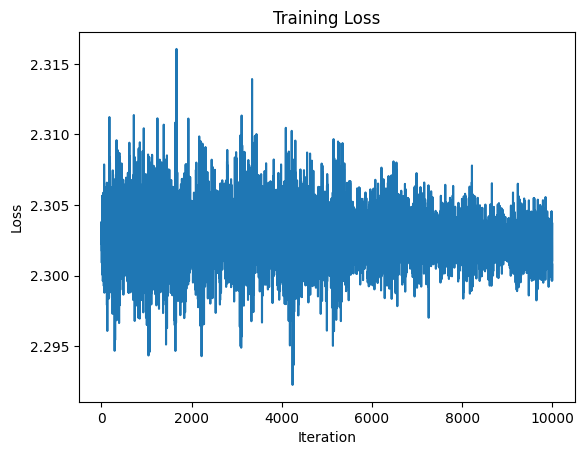

Test accuracy: 10.22%


In [2]:
# Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
Dhidden = 100      # Number of nodes in the hidden layer
K = 10             # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases for the input-to-hidden and hidden-to-output layers
w1 = torch.randn(Din, Dhidden) * std  # Weights from input to hidden layer
b1 = torch.zeros(Dhidden)             # Biases for the hidden layer
w2 = torch.randn(Dhidden, K) * std    # Weights from hidden to output layer
b2 = torch.zeros(K)                   # Biases for the output layer

# Hyperparameters
epochs = 10       # Number of epochs
lr = 2e-3         # Learning rate (increased for faster convergence)
lr_decay = 0.9    # Learning rate decay
reg = 0           # Regularization strength
loss_history = []

# Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        
        # Forward pass
        # Input to hidden layer with sigmoid activation
        h1 = torch.sigmoid(x_train.mm(w1) + b1)
        
        # Hidden to output layer
        y_pred = h1.mm(w2) + b2

        # Cross-entropy loss calculation
        loss = nn.functional.cross_entropy(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (torch.softmax(y_pred, dim=1) - nn.functional.one_hot(labels, K).float()) / Ntr
        dw2 = h1.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        # Gradients for hidden layer
        dh1 = dy_pred.mm(w2.t()) * h1 * (1 - h1)  # Derivative of sigmoid
        dw1 = x_train.t().mm(dh1) + reg * w1
        db1 = dh1.sum(dim=0)

        # Parameter updates
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

        # Calculate training accuracy
        _, predicted = torch.max(y_pred, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_acc = 100 * correct_train / total_train
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}, Training Accuracy: {train_acc:.2f}%')

    # Decay learning rate
    lr *= lr_decay

# Plot Loss
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass through hidden layer and output layer
        h1 = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = h1.mm(w2) + b2

        _, predicted_test = torch.max(y_test_pred, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


 In the original code, Mean Squared Error (MSE) was used as the loss function. However, for classification tasks,
 especially with multiple classes, Cross-Entropy Loss is generally preferred. Cross-Entropy Loss is better suited for
 classification because it penalizes incorrect class predictions more effectively, helping the model learn to make more
 confident predictions in the correct class. It does this by comparing the predicted probabilities with the actual class
 labels in a way that encourages the model to increase the probability for the true class while decreasing it for other
 classes.
 Using Cross-Entropy Loss in this neural network setup should improve both convergence speed and accuracy,
 as the loss function will be more directly aligned with the objective of maximizing classification accuracy.

## Question 2 - LeNet-5 network for MNIST using Pytorch

Epoch [1/10], Loss: 0.2708
Epoch [2/10], Loss: 0.0852
Epoch [3/10], Loss: 0.0579
Epoch [4/10], Loss: 0.0455
Epoch [5/10], Loss: 0.0380
Epoch [6/10], Loss: 0.0315
Epoch [7/10], Loss: 0.0261
Epoch [8/10], Loss: 0.0232
Epoch [9/10], Loss: 0.0193
Epoch [10/10], Loss: 0.0182


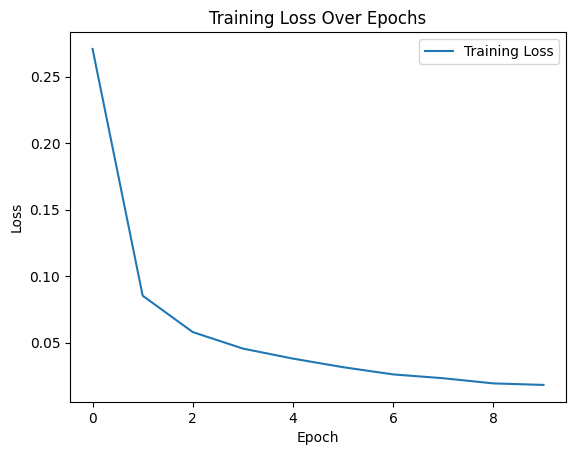

Training Accuracy: 99.55%
Test Accuracy: 98.71%


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Data Loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# 2. Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Output: 6x28x28
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)            # Output: 16x12x12
        self.fc1 = nn.Linear(16 * 5 * 5, 120)                             # Fully connected layer
        self.fc2 = nn.Linear(120, 84)                                     # Fully connected layer
        self.fc3 = nn.Linear(84, 10)                                      # Output layer for 10 classes

    def forward(self, x):
        x = torch.tanh(self.conv1(x))                       # First convolution layer + activation
        x = torch.nn.functional.avg_pool2d(x, 2)            # Average pooling layer (downsample to 14x14)
        x = torch.tanh(self.conv2(x))                       # Second convolution layer + activation
        x = torch.nn.functional.avg_pool2d(x, 2)            # Average pooling layer (downsample to 5x5)
        x = x.view(x.size(0), -1)                           # Flatten dynamically
        x = torch.tanh(self.fc1(x))                         # Fully connected layer + activation
        x = torch.tanh(self.fc2(x))                         # Fully connected layer + activation
        x = self.fc3(x)                                     # Output layer
        return x

model = LeNet5()

# 3. Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training the Model
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    average_loss = running_loss / len(trainloader)
    train_losses.append(average_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')

# 5. Plot Training Loss
plt.plot(train_losses, label="Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# 6. Evaluate Training Accuracy
model.eval()
correct_train = 0
total_train = 0
with torch.no_grad():
    for images, labels in trainloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_accuracy = 100 * correct_train / total_train
print(f'Training Accuracy: {train_accuracy:.2f}%')

# 7. Evaluate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f'Test Accuracy: {test_accuracy:.2f}%')


 Implemented a Convolutional Neural Network (CNN) inspired by the classic LeNet-5 architecture using PyTorch to
 classify images in the MNIST dataset. The network is designed with two convolutional layers followed by two fully
 connected layers to progressively extract features from the input images and classify them. The first convolutional
 layer detects low-level features with 6 filters, followed by a max-pooling layer to reduce spatial dimensions, while
 the second convolutional layer extracts more complex features with 16 filters. These features are then flattened
 and passed through two fully connected layers, which use a tanh activation to create a non-linear mapping from
 the extracted features to the ten-digit classes (0-9) of MNIST.
 After defining the model architecture, we proceeded with training it for 10 epochs using the cross-entropy loss
 function and the Adam optimizer. This combination was chosen to efficiently optimize the model and minimize
 classification error. During each epoch, the model learned to adjust its parameters based on the calculated gradients,
 helping it distinguish between different digit classes with increasing accuracy. By the end of the training, we
 evaluated the model on both the training and test datasets to measure its generalization performance.

## Question 3. Classify hymenoptera dataset using fine tuning and feature extractor

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

### Load the data

In [10]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Visualize a few images

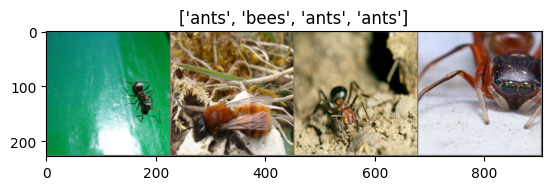

In [11]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

### Training the model

In [12]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

### Visualizing the model predictions

In [13]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

### a) Finetuning the ConvNet

In [14]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Raveen/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [01:24<00:00, 552kB/s]


### Train and evaluate

In [16]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.3945 Acc: 0.8525
val Loss: 0.2530 Acc: 0.9085

Epoch 1/24
----------
train Loss: 0.4514 Acc: 0.8197
val Loss: 0.2837 Acc: 0.8954

Epoch 2/24
----------
train Loss: 0.5369 Acc: 0.7910
val Loss: 0.2548 Acc: 0.9150

Epoch 3/24
----------
train Loss: 0.6306 Acc: 0.7541
val Loss: 0.3475 Acc: 0.8693

Epoch 4/24
----------
train Loss: 0.4253 Acc: 0.8238
val Loss: 0.4200 Acc: 0.8758

Epoch 5/24
----------
train Loss: 0.4450 Acc: 0.8279
val Loss: 0.3483 Acc: 0.8693

Epoch 6/24
----------
train Loss: 0.2941 Acc: 0.8648
val Loss: 0.2772 Acc: 0.8954

Epoch 7/24
----------
train Loss: 0.3076 Acc: 0.8811
val Loss: 0.2233 Acc: 0.9085

Epoch 8/24
----------
train Loss: 0.2295 Acc: 0.9057
val Loss: 0.2348 Acc: 0.9216

Epoch 9/24
----------
train Loss: 0.3536 Acc: 0.8402
val Loss: 0.2227 Acc: 0.9150

Epoch 10/24
----------
train Loss: 0.2826 Acc: 0.8934
val Loss: 0.2177 Acc: 0.9150

Epoch 11/24
----------
train Loss: 0.2674 Acc: 0.8566
val Loss: 0.2193 Acc: 0.9150

Ep

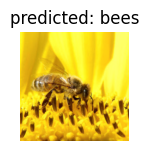

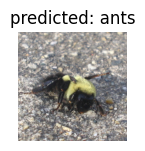

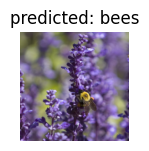

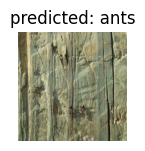

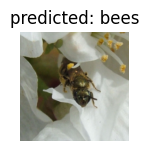

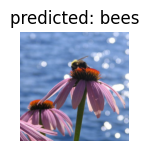

In [18]:
visualize_model(model_ft)

### b) ConvNet as fixed feature extractor

In [19]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [20]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6923 Acc: 0.6352
val Loss: 0.3570 Acc: 0.8170

Epoch 1/24
----------
train Loss: 0.5385 Acc: 0.7623
val Loss: 0.2593 Acc: 0.9085

Epoch 2/24
----------
train Loss: 0.5245 Acc: 0.7459
val Loss: 0.1863 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.4896 Acc: 0.7910
val Loss: 0.4043 Acc: 0.8562

Epoch 4/24
----------
train Loss: 0.6282 Acc: 0.7459
val Loss: 0.3096 Acc: 0.8954

Epoch 5/24
----------
train Loss: 0.5106 Acc: 0.7951
val Loss: 0.3240 Acc: 0.8758

Epoch 6/24
----------
train Loss: 0.3569 Acc: 0.8402
val Loss: 0.3492 Acc: 0.8758

Epoch 7/24
----------
train Loss: 0.2551 Acc: 0.8975
val Loss: 0.2109 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.3045 Acc: 0.8770
val Loss: 0.2289 Acc: 0.9150

Epoch 9/24
----------
train Loss: 0.3259 Acc: 0.8443
val Loss: 0.2477 Acc: 0.9216

Epoch 10/24
----------
train Loss: 0.4507 Acc: 0.8320
val Loss: 0.2076 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.3354 Acc: 0.8279
val Loss: 0.1939 Acc: 0.9477

Ep

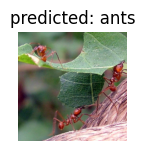

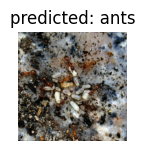

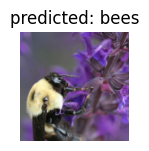

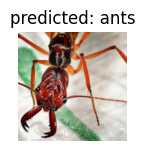

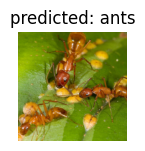

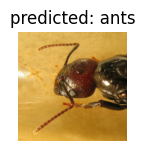

In [21]:
visualize_model(model_conv)

plt.ioff()
plt.show()

 In this task, we applied two common transfer learning techniques using a pre-trained ResNet18 model to classify
 the Hymenoptera dataset, which consists of images of ants and bees. For fine-tuning, we unfreezed the weights
 of the final layers of the pre-trained model and trained them on our dataset, allowing the model to adjust its
 parameters specifically for the new task while retaining the learned features from ImageNet. In feature extraction,
 we froze the weights of the pre-trained model and only trained a new classifier layer on top, using the features
 extracted by the ResNet18 backbone. These approaches allow the model to leverage the general visual features
 learned from ImageNet and adapt to the specific task of classifying hymenoptera species with minimal additional
 training